In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score,classification_report 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("/kaggle/input/phishing-url-detection/Phishing.csv")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [3]:
df.columns.unique

<bound method Index.unique of Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')>

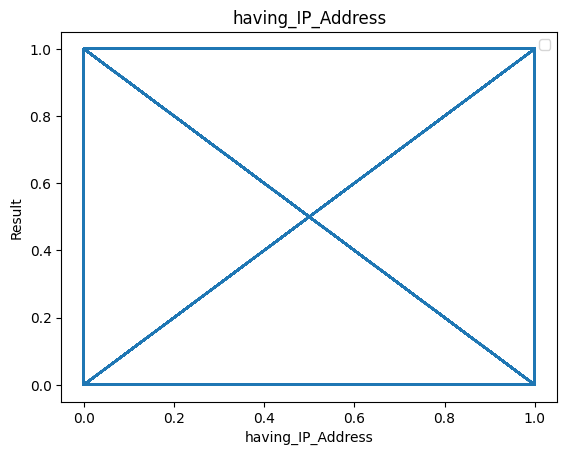

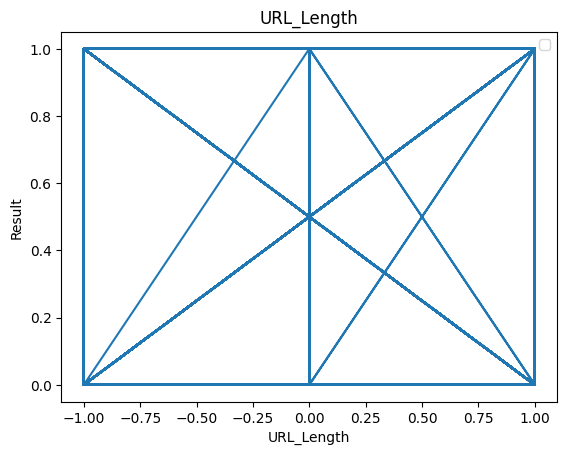

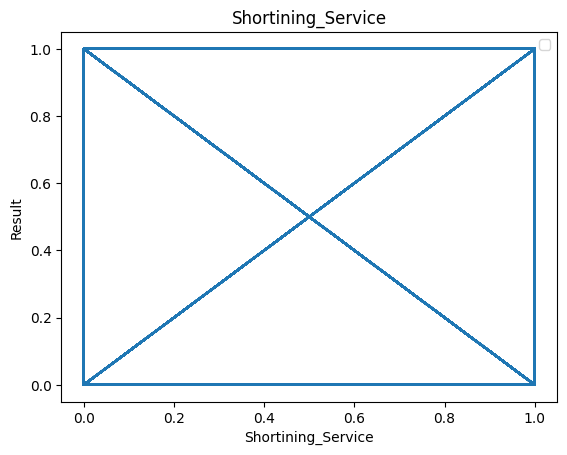

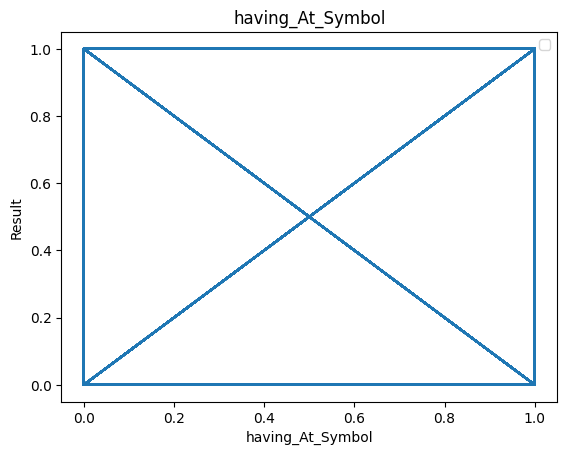

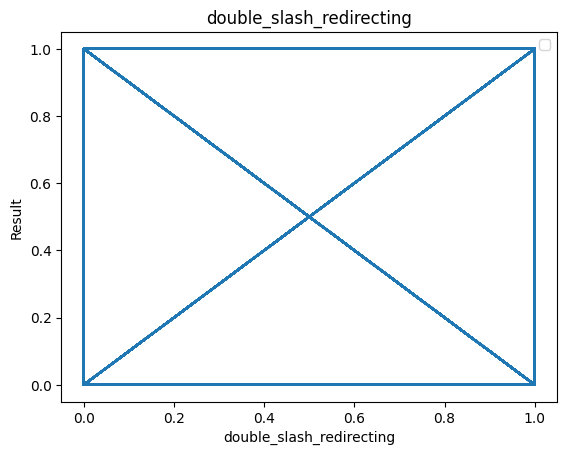

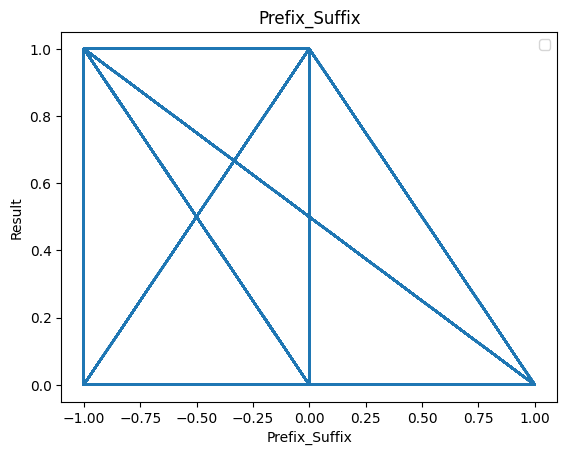

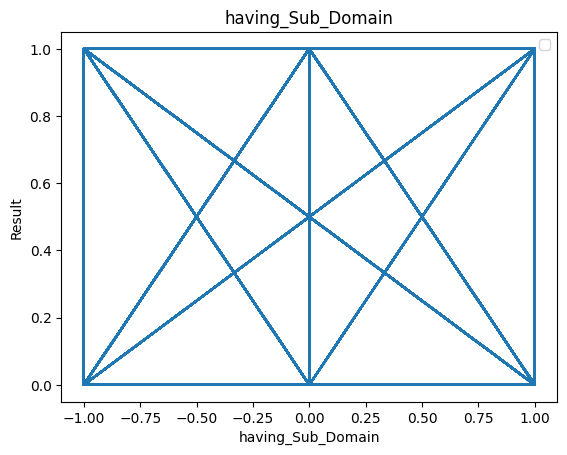

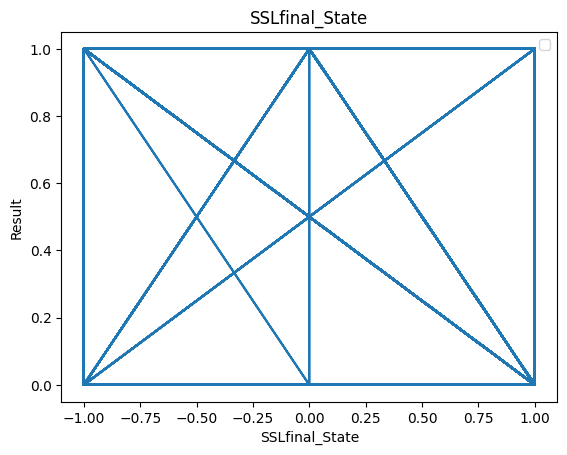

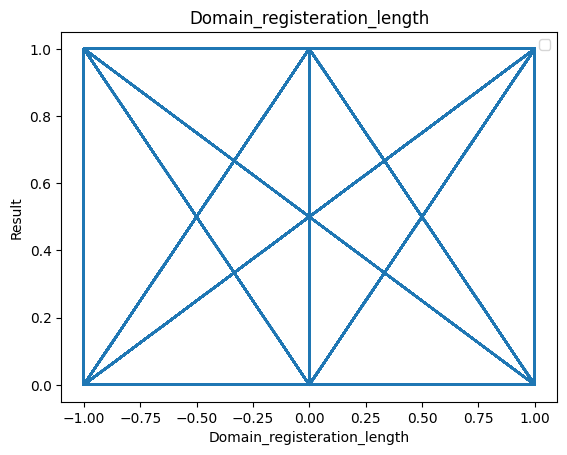

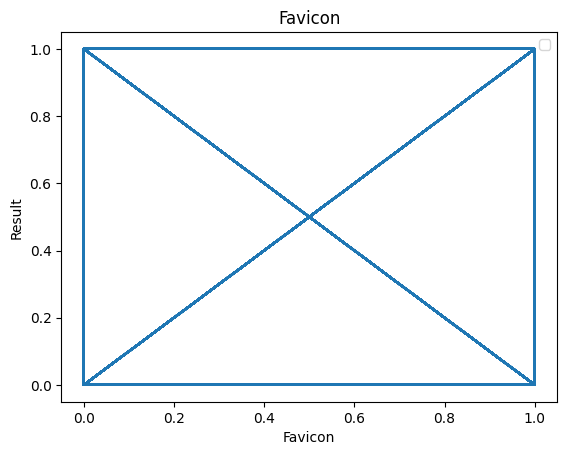

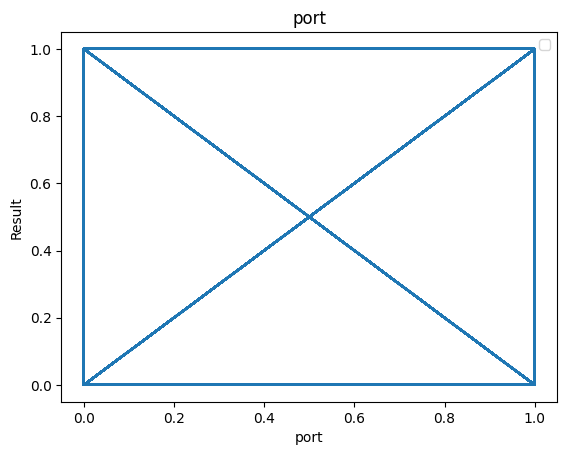

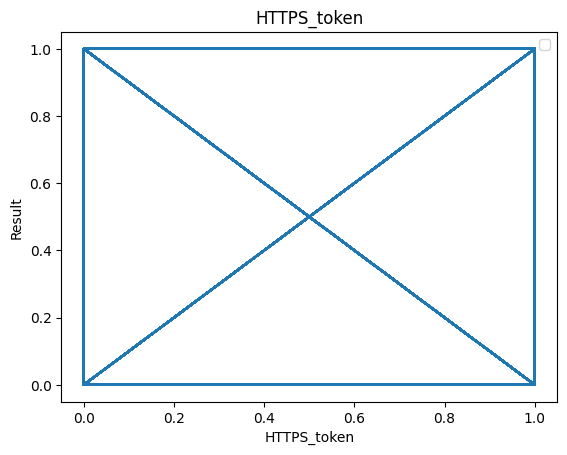

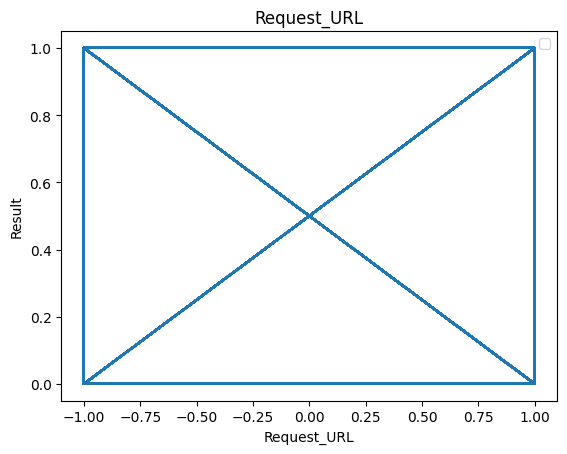

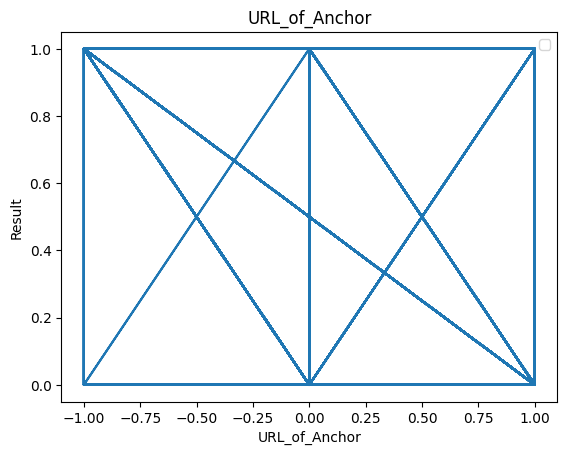

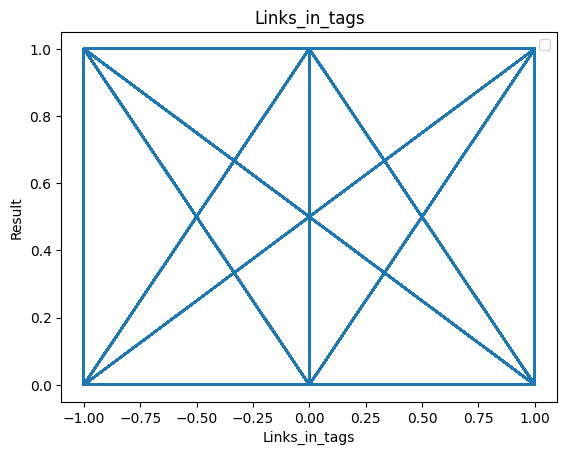

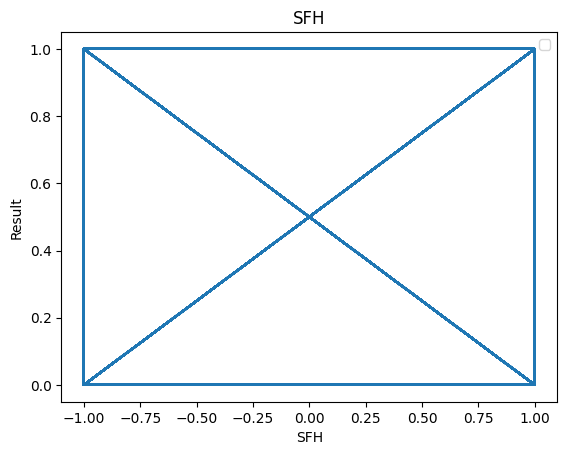

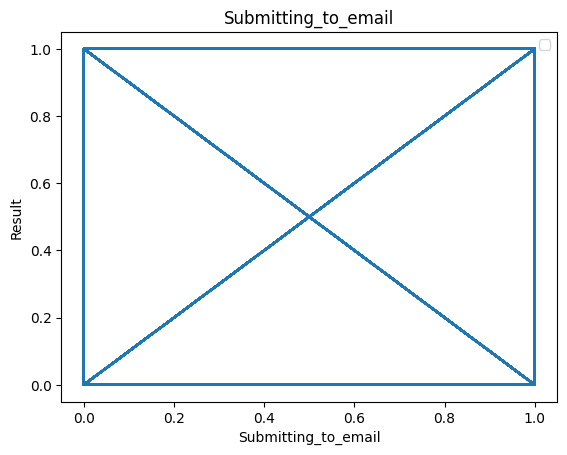

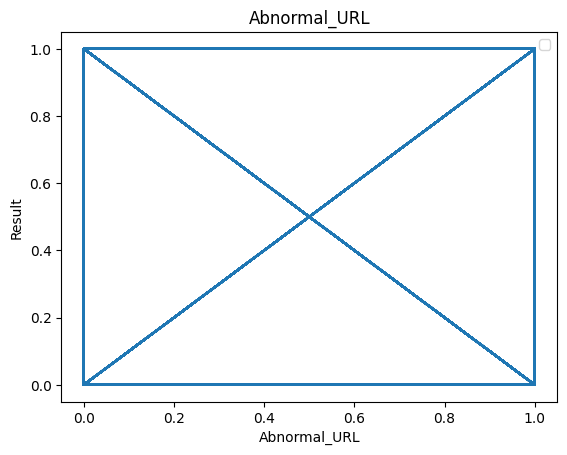

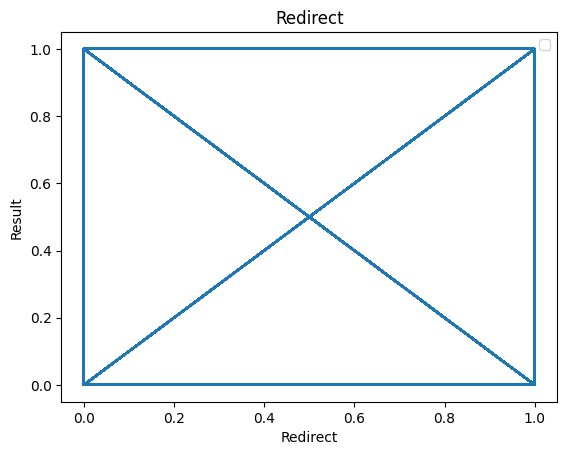

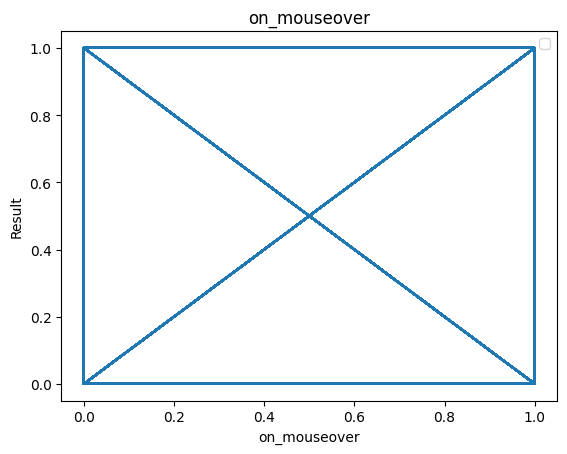

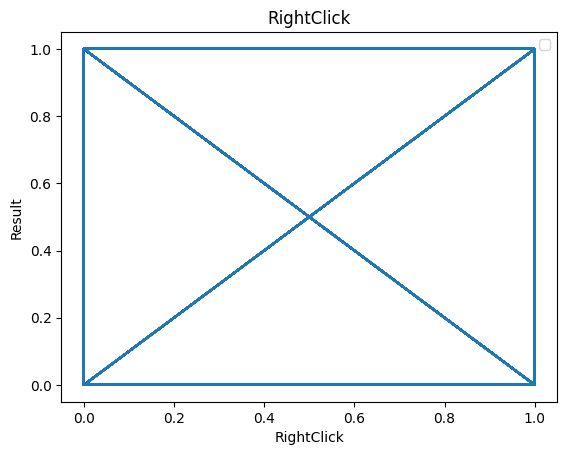

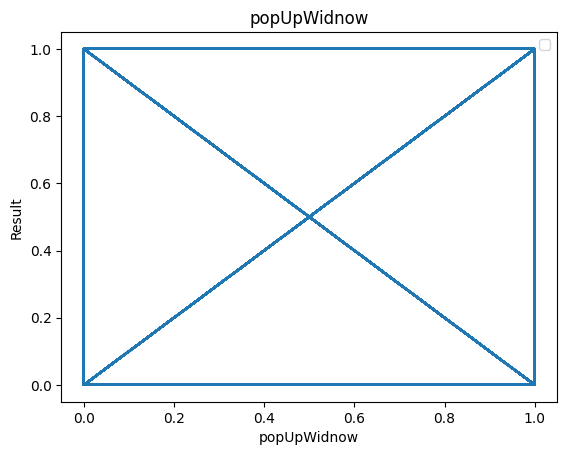

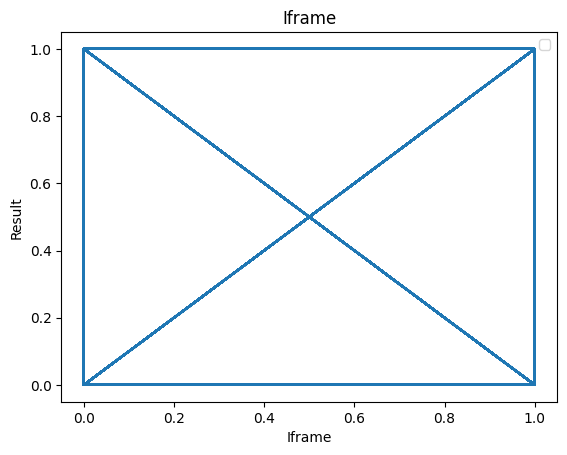

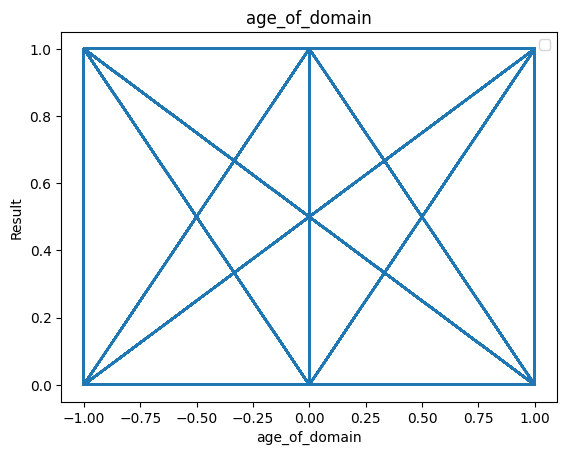

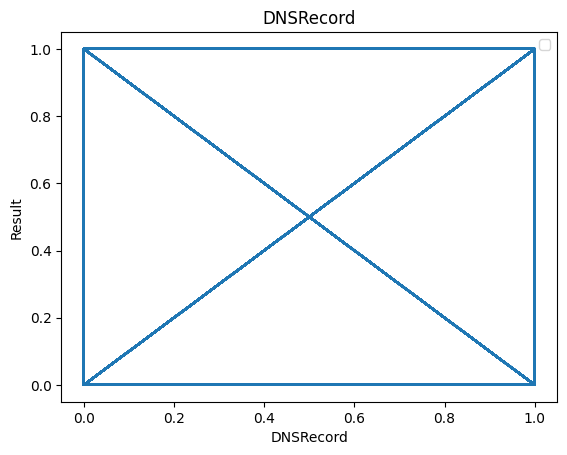

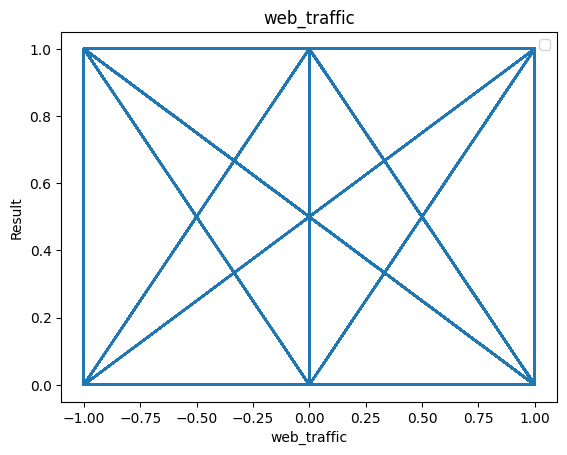

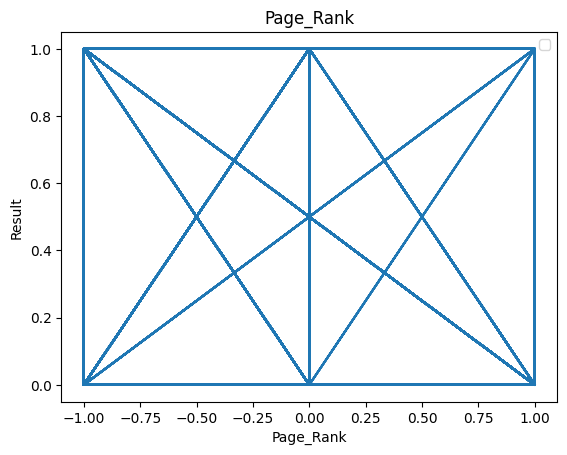

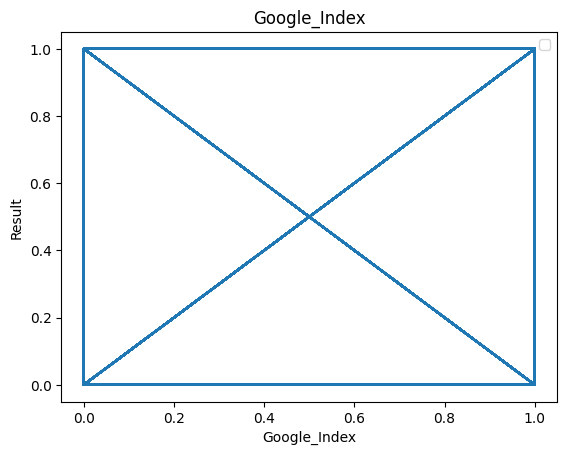

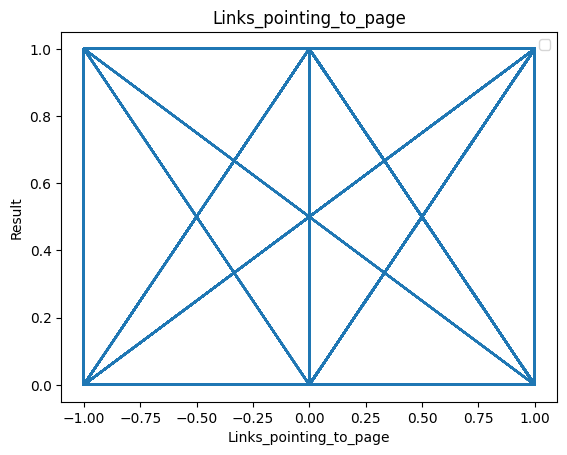

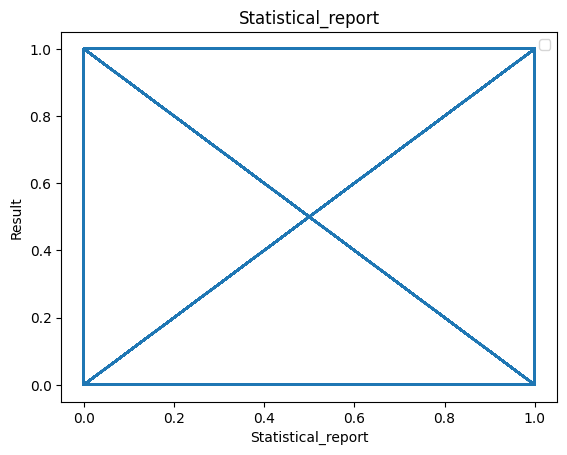

In [4]:
for label in df.columns[:-1]:
    plt.plot(df[label],df['Result'])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Result")
    plt.legend()
    plt.show()

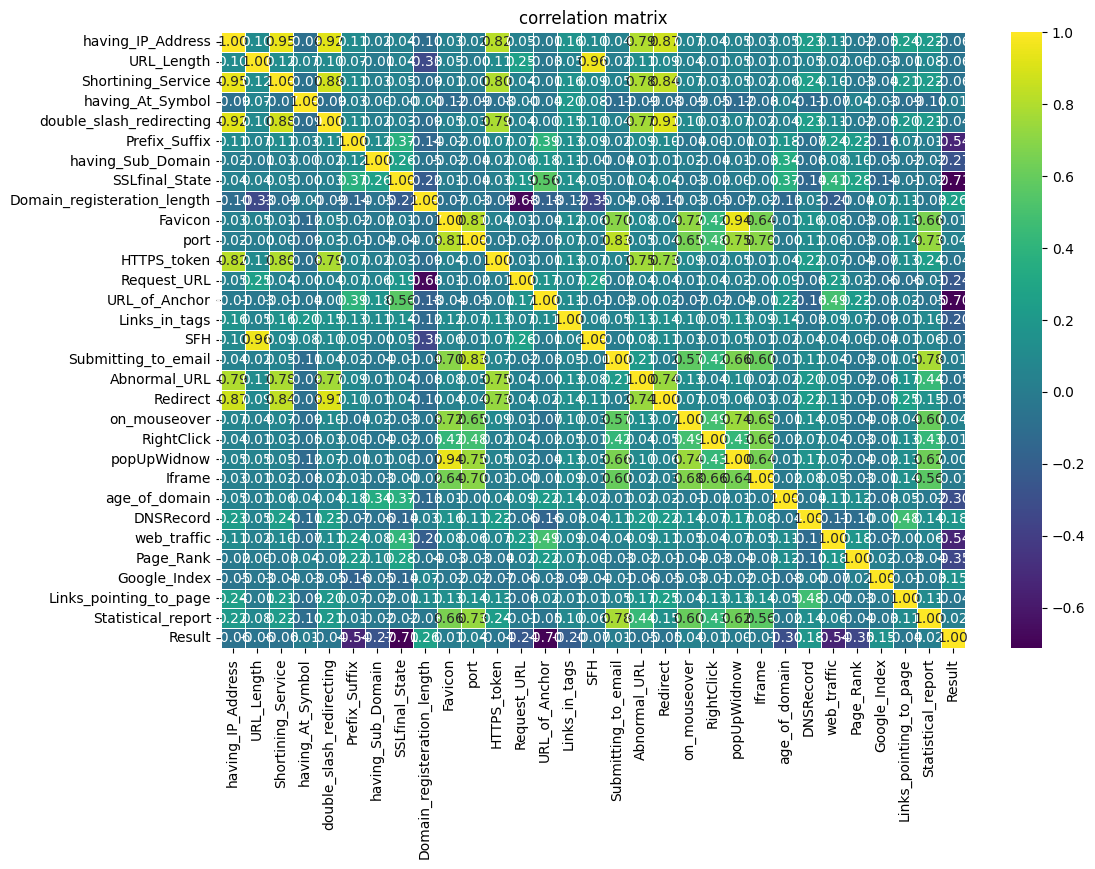

In [5]:
corr_matrix=df.corr()
plt.figure(figsize=(12,8))
# viridis , plasma , coolwarm 
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title("correlation matrix")
plt.show()

In [6]:
df.columns.unique

<bound method Index.unique of Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')>

In [7]:
features=["web_traffic","URL_of_Anchor","SSLfinal_State","Prefix_Suffix","age_of_domain"]
X=df[features]
y=df["Result"]
X.shape 

(2456, 5)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)


In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1719, 5)
(737, 5)
(1719,)
(737,)


# Random Forest Model

In [10]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [11]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       403
           1       0.95      0.92      0.93       334

    accuracy                           0.94       737
   macro avg       0.94      0.94      0.94       737
weighted avg       0.94      0.94      0.94       737



# Keras Model 

In [12]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense 

nn_model = Sequential()
nn_model.add(Dense(units=9,kernel_initializer="uniform",activation="relu", input_dim=5))
nn_model.add(Dense(units=9,kernel_initializer="uniform",activation="relu"))
nn_model.add(Dense(units=5,kernel_initializer="uniform",activation="relu"))
nn_model.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

nn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
nn_model.fit(X_train,y_train, batch_size=32, epochs=10)

2025-08-10 11:56:01.635789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754826961.964255      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754826962.054431      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-10 11:56:18.566544: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5486 - loss: 0.6926
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5639 - loss: 0.6789
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5389 - loss: 0.5785
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - loss: 0.4283
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9148 - loss: 0.3977
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9256 - loss: 0.3519
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9434 - loss: 0.3412
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9325 - loss: 0.3276
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9414 - loss: 0.3065
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9362 - loss: 0.3116


In [13]:
# If it's binary classification
y_pred_labels = (y_pred > 0.5).astype(int)

# Then use classification_report
print(classification_report(y_test, y_pred_labels))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       414
           1       0.92      0.95      0.93       323

    accuracy                           0.94       737
   macro avg       0.94      0.94      0.94       737
weighted avg       0.94      0.94      0.94       737

